In [95]:
# Loading the necessary libraries
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(MASS)




person_age : Âge de la personne  
person_gender : Genre de la personne  
person_education : Niveau d'éducation le plus élevé  
person_income : Revenu annuel  
person_emp_exp : Années d'expérience professionnelle  
person_home_ownership : Statut de propriété du logement (ex. : location, propriétaire, hypothèque)  
loan_amnt : Montant du prêt demandé  
loan_intent : Objet du prêt  
loan_int_rate : Taux d'intérêt du prêt  
loan_percent_income : Montant du prêt en pourcentage du revenu annuel  
cb_person_cred_hist_length : Durée de l'historique de crédit en années  
credit_score : Score de crédit de la personne  
previous_loan_defaults_on_file : Indicateur de défauts de paiement sur des prêts précédents  
loan_status : Statut d'approbation du prêt (1 = approuvé ; 0 = refusé)  


In [96]:
data <- read.csv("loan_data.csv")
head(data)
summary(data)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>
1,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
2,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
3,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
4,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
5,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
6,21,female,High School,12951,0,OWN,2500,VENTURE,7.14,0.19,2,532,No,1


   person_age     person_gender      person_education   person_income    
 Min.   : 20.00   Length:45000       Length:45000       Min.   :   8000  
 1st Qu.: 24.00   Class :character   Class :character   1st Qu.:  47204  
 Median : 26.00   Mode  :character   Mode  :character   Median :  67048  
 Mean   : 27.76                                         Mean   :  80319  
 3rd Qu.: 30.00                                         3rd Qu.:  95789  
 Max.   :144.00                                         Max.   :7200766  
 person_emp_exp   person_home_ownership   loan_amnt     loan_intent       
 Min.   :  0.00   Length:45000          Min.   :  500   Length:45000      
 1st Qu.:  1.00   Class :character      1st Qu.: 5000   Class :character  
 Median :  4.00   Mode  :character      Median : 8000   Mode  :character  
 Mean   :  5.41                         Mean   : 9583                     
 3rd Qu.:  8.00                         3rd Qu.:12237                     
 Max.   :125.00                 

In [97]:
data[, "person_gender"] <- as.factor(data[, "person_gender"])
data[, "person_education"] <- as.factor(data[, "person_education"])
data[, "person_home_ownership"] <- as.factor(data[, "person_home_ownership"])
data[, "loan_intent"] <- as.factor(data[, "loan_intent"])
data[, "previous_loan_defaults_on_file"] <- as.factor(data[, "previous_loan_defaults_on_file"])
data[, "loan_status"] <- as.factor(data[, "loan_status"])

In [98]:
sum(is.na(data))  # Đếm tổng số giá trị NA trong toàn bộ dataframe
str(data)

[1] 0

'data.frame':	45000 obs. of  14 variables:
 $ person_age                    : num  22 21 25 23 24 21 26 24 24 21 ...
 $ person_gender                 : Factor w/ 2 levels "female","male": 1 1 1 1 2 1 1 1 1 1 ...
 $ person_education              : Factor w/ 5 levels "Associate","Bachelor",..: 5 4 4 2 5 4 2 4 1 4 ...
 $ person_income                 : num  71948 12282 12438 79753 66135 ...
 $ person_emp_exp                : int  0 0 3 0 1 0 1 5 3 0 ...
 $ person_home_ownership         : Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 3 1 4 4 3 4 4 4 3 ...
 $ loan_amnt                     : num  35000 1000 5500 35000 35000 2500 35000 35000 35000 1600 ...
 $ loan_intent                   : Factor w/ 6 levels "DEBTCONSOLIDATION",..: 5 2 4 4 4 6 2 4 5 6 ...
 $ loan_int_rate                 : num  16 11.1 12.9 15.2 14.3 ...
 $ loan_percent_income           : num  0.49 0.08 0.44 0.44 0.53 0.19 0.37 0.37 0.35 0.13 ...
 $ cb_person_cred_hist_length    : num  3 2 3 2 4 2 3 4 2 3 ...
 $ credit_score  

In [99]:
data$loan_percent_income <- NULL

In [100]:
quanti_data <- Filter(is.numeric, data)

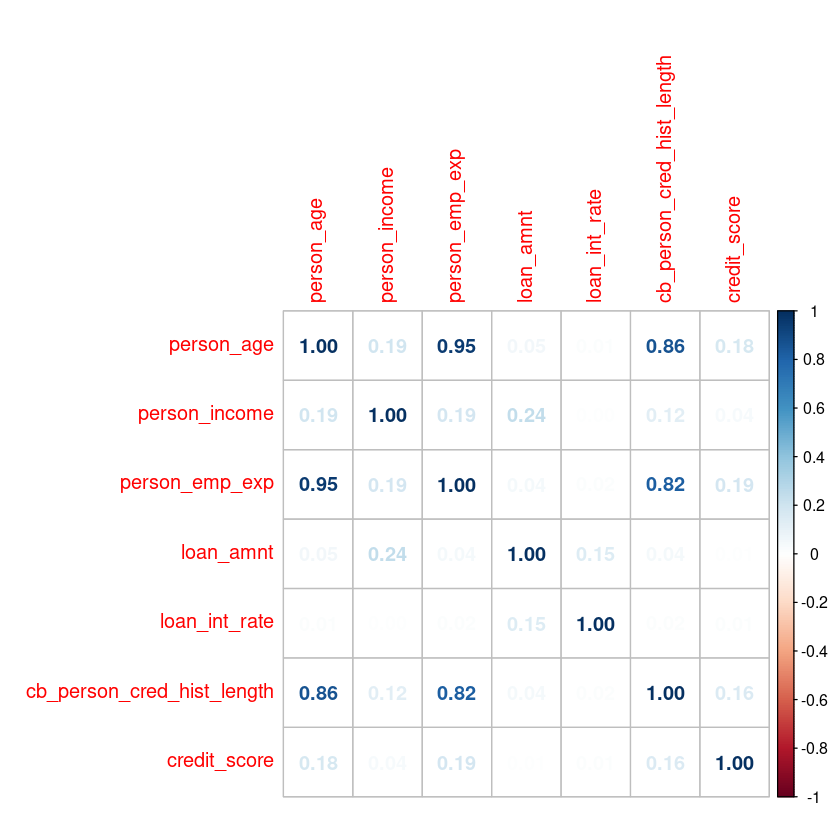

In [101]:

corrplot(cor(quanti_data),method="number")


In [102]:
data$person_age <- NULL
quanti_data <- Filter(is.numeric, data)

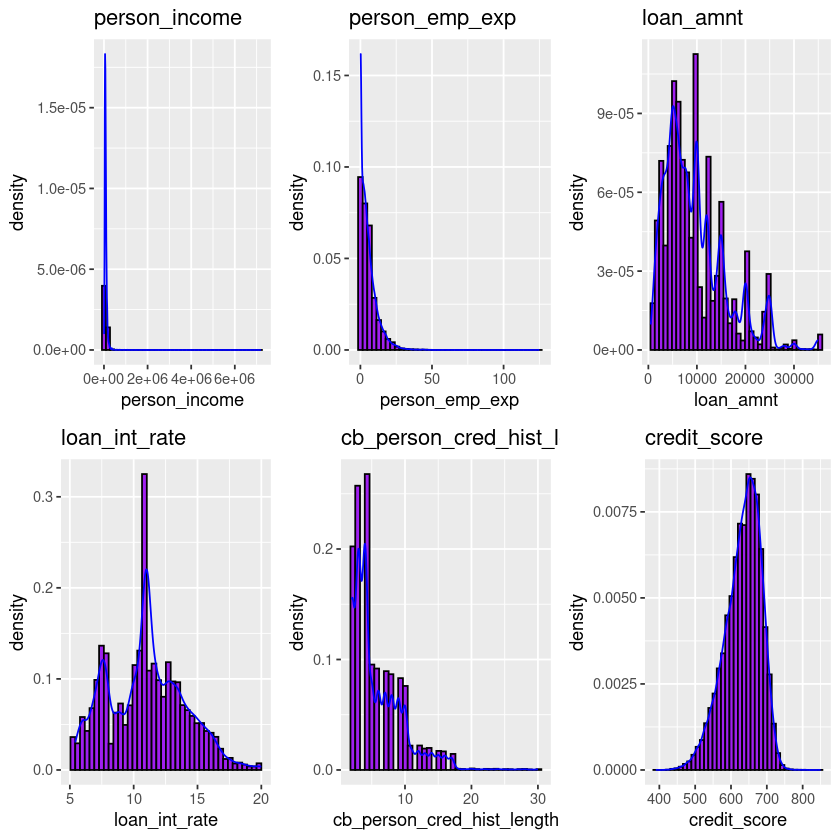

In [103]:
# les graphiques

options(warn = 0)

plot_all_histograms <- function(df, num_bin=NULL) {
  numeric_cols <- df[sapply(df, is.numeric)]
  
  # Créer une liste de graphiques
  plots <- lapply(names(numeric_cols), function(col) 
      
    ggplot(df, aes_string(x = col)) +
      geom_histogram(aes(y = after_stat(density)), bins=num_bin, fill = "purple", color = "black") +
      geom_density(alpha = 0.2, col = "blue") +
      ggtitle(col)
  )
  
  # Afficher les graphiques en grille (3 lignes x 4 colonnes)
  do.call(grid.arrange, c(plots, ncol = 3))
}

plot_all_histograms(data, 40)


In [104]:
# quanti_data<-scale(quanti_data)
data[ , sapply(data, is.numeric)] <- scale(data[ , sapply(data, is.numeric)])
head(data)

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,female,Master,-0.104088450,-0.8922742,RENT,4.0249087,PERSONAL,1.68302010,-0.7391003,-1.41979830,No,1
2,female,High School,-0.845995267,-0.8922742,OWN,-1.3591942,EDUCATION,0.04478107,-0.9968521,-2.54994646,Yes,0
3,female,High School,-0.844055512,-0.3975131,MORTGAGE,-0.6465924,MEDICAL,0.62555024,-0.7391003,0.04741159,No,1
4,female,Bachelor,-0.007038493,-0.8922742,RENT,4.0249087,MEDICAL,1.41781338,-0.9968521,0.84049802,No,1
5,male,Master,-0.176369218,-0.7273538,RENT,4.0249087,MEDICAL,1.09553684,-0.4813486,-0.92411929,No,1
6,female,High School,-0.837676700,-0.8922742,OWN,-1.1216603,VENTURE,-1.29803781,-0.9968521,-1.99478596,No,1


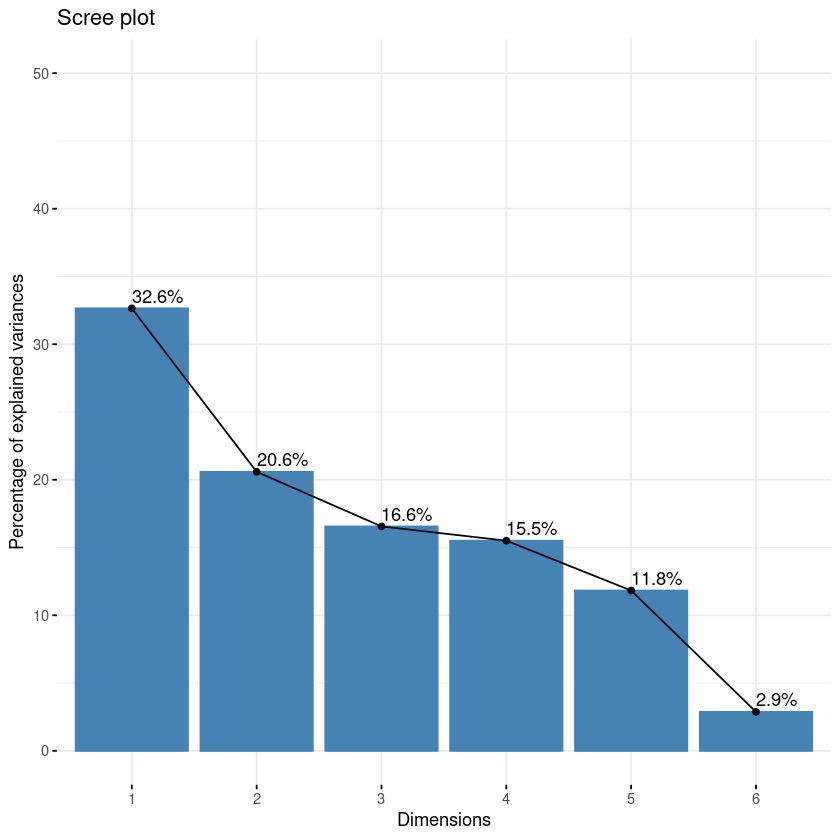

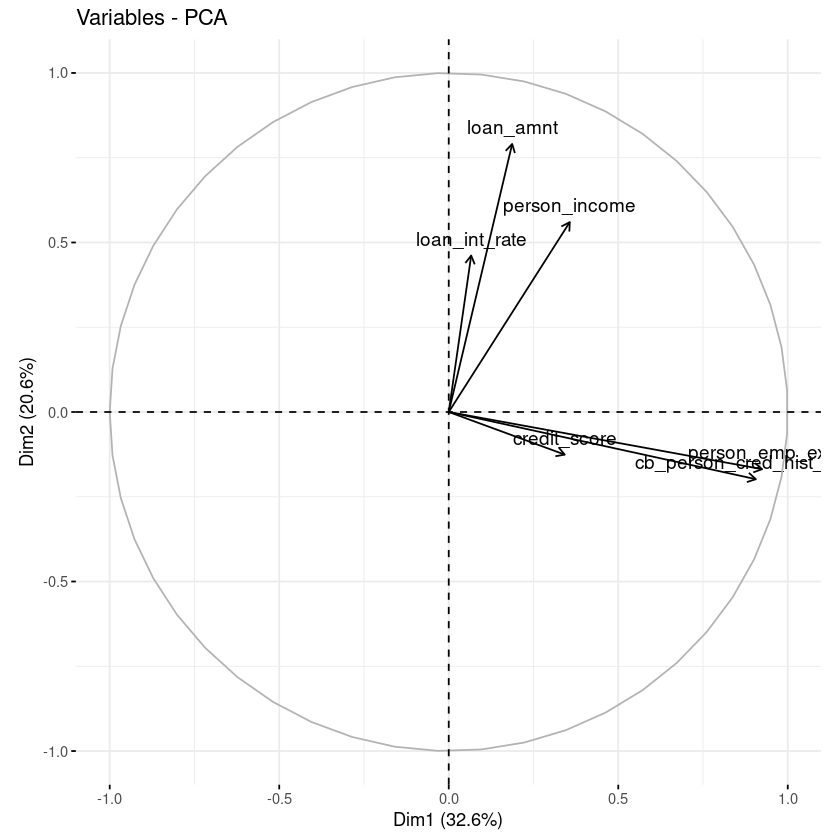

In [105]:

acp <- PCA(data, scale.unit = TRUE,
           graph = FALSE, quali.sup=c(1,2,5,7,11,12), ncp = 6)

fviz_eig(acp, addlabels = TRUE, ylim = c(0, 50))

fviz_pca_var(acp)




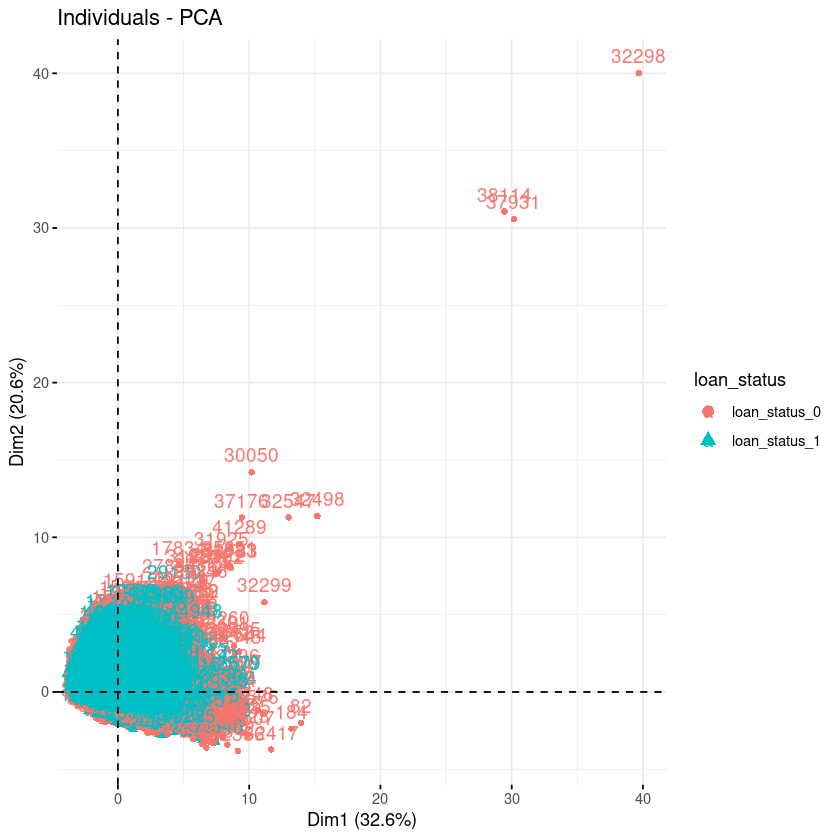

In [106]:
fviz_pca_ind(acp, habillage=12)


In [107]:
head(data)

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,female,Master,-0.104088450,-0.8922742,RENT,4.0249087,PERSONAL,1.68302010,-0.7391003,-1.41979830,No,1
2,female,High School,-0.845995267,-0.8922742,OWN,-1.3591942,EDUCATION,0.04478107,-0.9968521,-2.54994646,Yes,0
3,female,High School,-0.844055512,-0.3975131,MORTGAGE,-0.6465924,MEDICAL,0.62555024,-0.7391003,0.04741159,No,1
4,female,Bachelor,-0.007038493,-0.8922742,RENT,4.0249087,MEDICAL,1.41781338,-0.9968521,0.84049802,No,1
5,male,Master,-0.176369218,-0.7273538,RENT,4.0249087,MEDICAL,1.09553684,-0.4813486,-0.92411929,No,1
6,female,High School,-0.837676700,-0.8922742,OWN,-1.1216603,VENTURE,-1.29803781,-0.9968521,-1.99478596,No,1


In [108]:
library(fastDummies)
library(MASS)

data_encoded <- data-c("person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file","loan_status"), remove_selected_columns = TRUE)


ERROR: Error in parse(text = x, srcfile = src): <text>:4:128: ',' inattendu(e)
3: 
4: data_encoded <- data-c("person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file","loan_status"),
                                                                                                                                  ^


In [ ]:
library(MASS)

# LDA (với biến phân loại là person_gender)
lda_model <- lda(person_gender ~ ., data = data_encoded)

lda_pred <- predict(lda_model)


# Vẽ biểu đồ LDA
plot(lda_pred$x,
     pch = 19,
     xlab = "LD1", ylab = "LD2",

       col = c("blue", "red"), pch = 19)


# MCA

In [109]:
data_quali <- data[, sapply(data, function(col) is.factor(col) || is.character(col))]

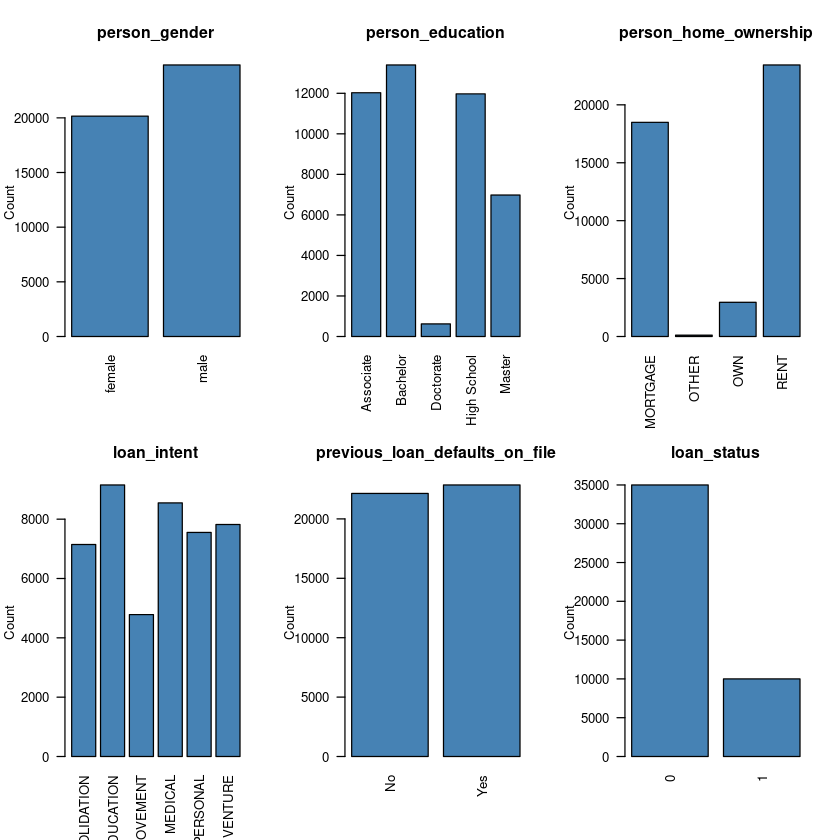

In [110]:
par(mfrow=c(2,3))
I = 6
for (i in 1:I) {
    plot(data_quali[,i], main = colnames(data_quali)[i],
         ylab = "Count", col="steelblue", las = 2)
    }


In [111]:
"person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file","loan_status",
" 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:19: ',' inattendu(e)
1: "person_education",
                      ^


**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 45000 individuals, described by 6 variables
*The results are available in the following objects:

   name                description                                          
1  "$eig"              "eigenvalues"                                        
2  "$var"              "results for the variables"                          
3  "$var$coord"        "coord. of the categories"                           
4  "$var$cos2"         "cos2 for the categories"                            
5  "$var$contrib"      "contributions of the categories"                    
6  "$var$v.test"       "v-test for the categories"                          
7  "$var$eta2"         "coord. of variables"                                
8  "$ind"              "results for the individuals"                        
9  "$ind$coord"        "coord. for the individuals"                         
10 "$ind$cos2"         "cos2 for the individ

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.33289840,16.644920,16.64492
dim 2,0.20264018,10.132009,26.77693
dim 3,0.20135310,10.067655,36.84458
dim 4,0.20076929,10.038464,46.88305
dim 5,0.20057566,10.028783,56.91183
dim 6,0.19946892,9.973446,66.88528
dim 7,0.19847368,9.923684,76.80896
dim 8,0.19780936,9.890468,86.69943
dim 9,0.17774222,8.887111,95.58654
dim 10,0.08826921,4.413460,100.00000


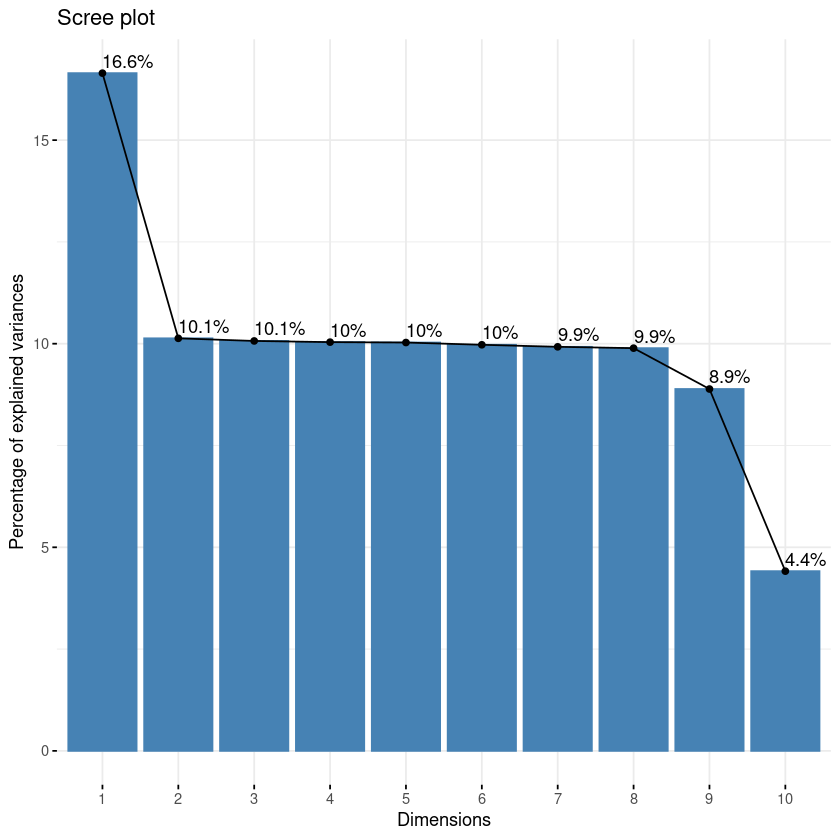

In [146]:
res.mca = MCA(data_quali,quali.sup = 4,graph = FALSE)
res.mca
res.mca$eig #K-p = 21-6 = 15
fviz_screeplot(res.mca, addlabels=TRUE) 

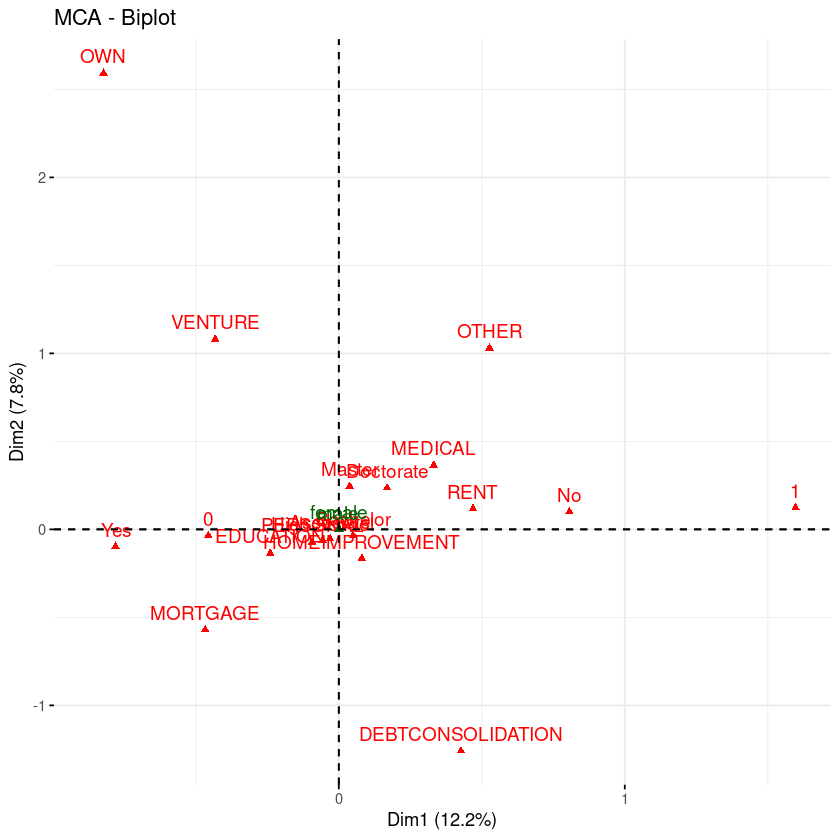

In [113]:
fviz_mca_biplot(res.mca,invisible="ind")


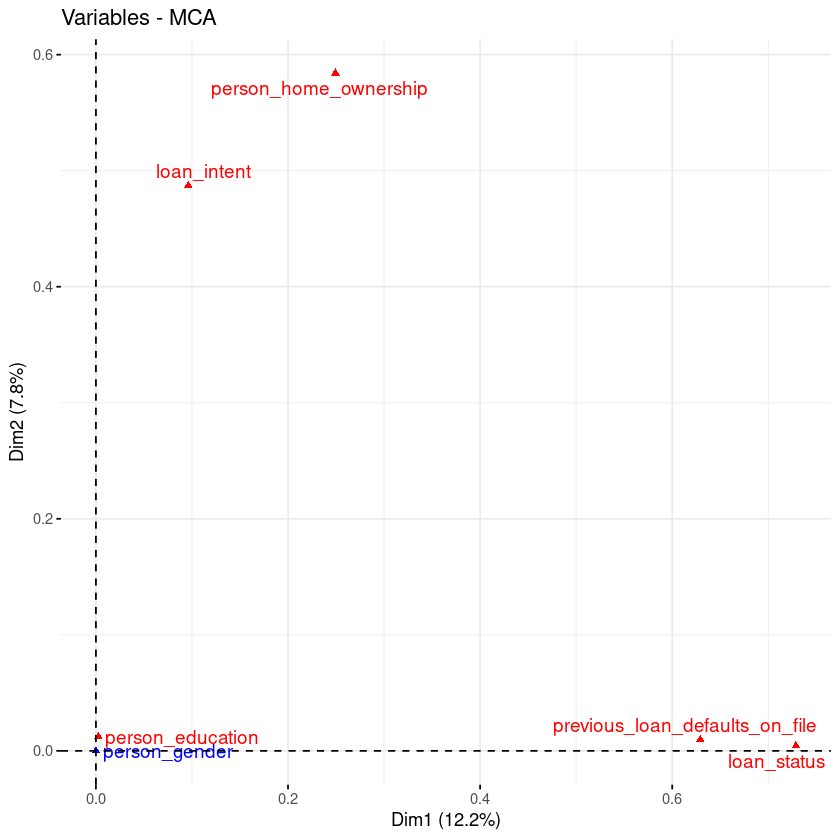

In [114]:
fviz_mca_var(res.mca, choice = "mca.cor",repel = TRUE)

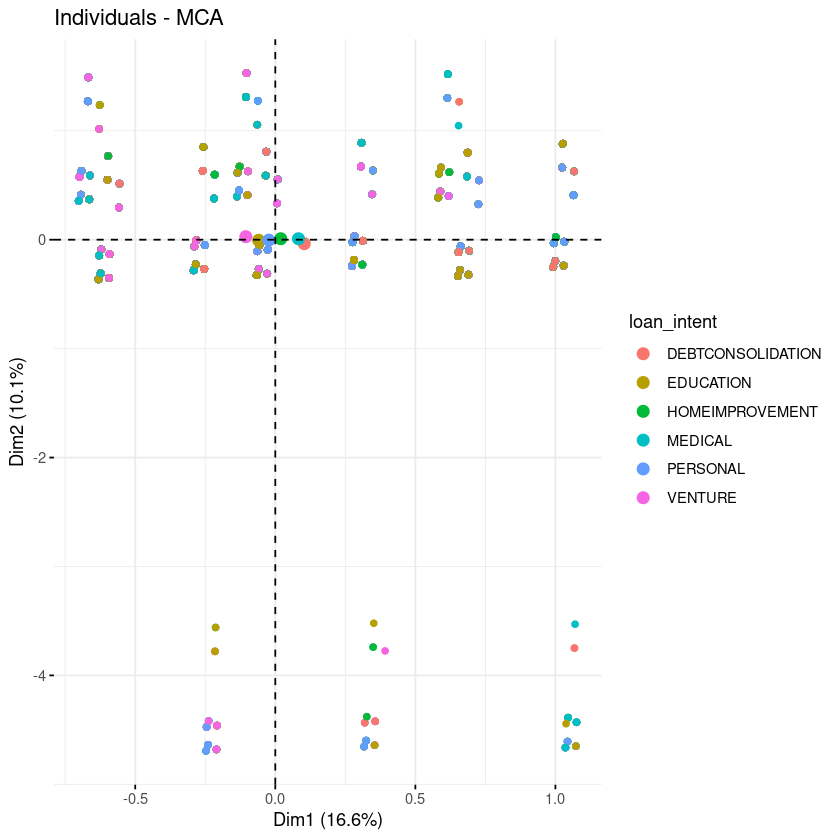

In [147]:
fviz_mca_ind(res.mca, label = "none", habillage = "loan_intent")

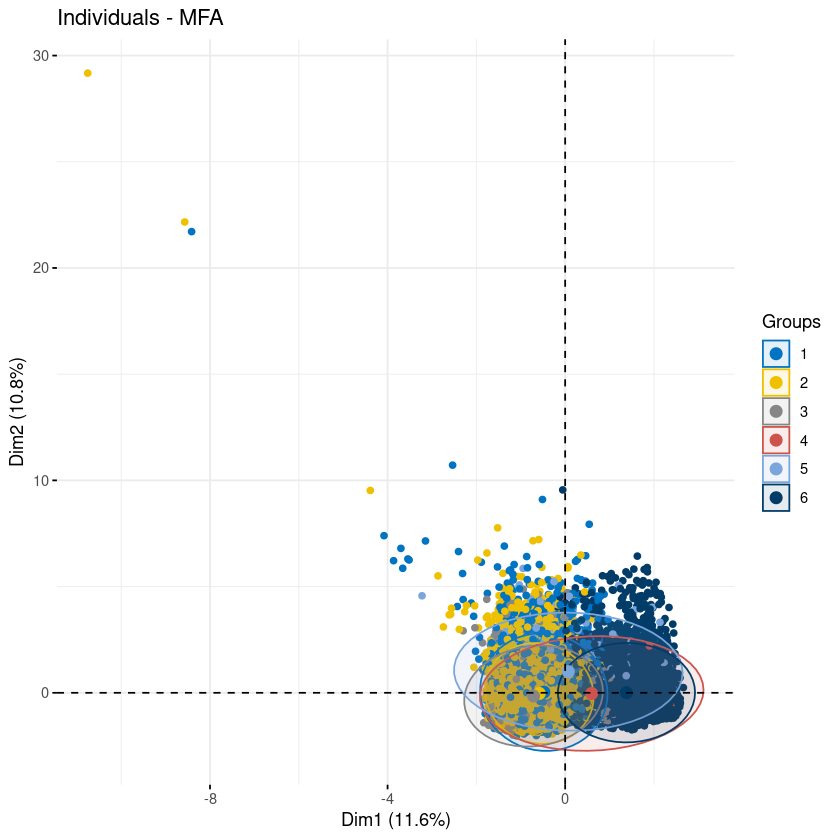

In [148]:
set.seed(123)
coords <- res.mca$ind$coord
km_res <- kmeans(coords, centers = 6, nstart = 25)
fviz_mfa_ind(res.mfa,habillage = as.factor(km_res$cluster),palette = "jco", addEllipses = TRUE, label = "none")

In [149]:
table(as.factor(km_res$cluster), data_quali$loan_intent)

   
    DEBTCONSOLIDATION EDUCATION HOMEIMPROVEMENT MEDICAL PERSONAL VENTURE
  1              1455      2134             955    1653     1654    1671
  2              2928      4137            1955    3341     3278    3514
  3                71       585             327     464      497     873
  4                17        18              12      21       22      27
  5                93        95              83     134      109     106
  6              2581      2184            1451    2935     1992    1628

# MFA

In [143]:
data_mfa <- data.frame(quanti_data, data_quali[,-2])
res.mfa <- MFA(
  data_mfa,
  group = c(6, 5),     # Nombre de variables par groupe
  type = c("s", "n"),# "s" = quanti, "n" = quali
  name.group = c("Group_quanti", "Group_quali"),  # noms des groupes
  graph = FALSE
)

In [ ]:
fviz_screeplot(res.mfa, addlabels = TRUE)

In [ ]:
fviz_mfa_ind(res.mfa, label = "none", repel = TRUE)

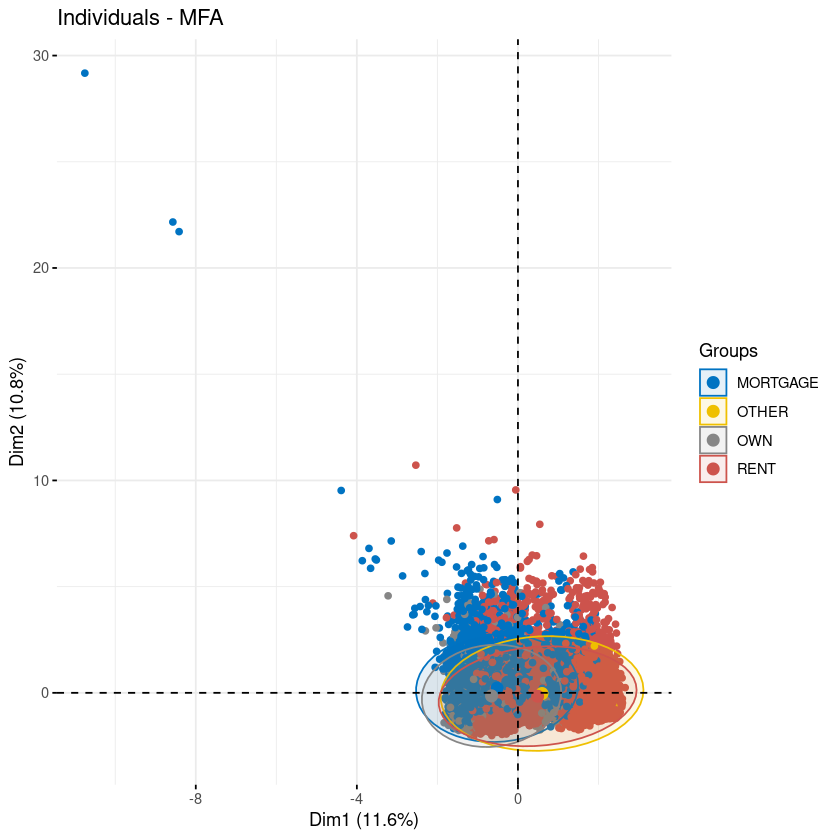

In [144]:
fviz_mfa_ind(res.mfa,
             label = "none",
             habillage = data_quali$person_home_ownership,
             addEllipses = TRUE,
             palette = "jco")

In [ ]:
fviz_mfa_var(res.mfa, "quanti.var", repel = TRUE,
             col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

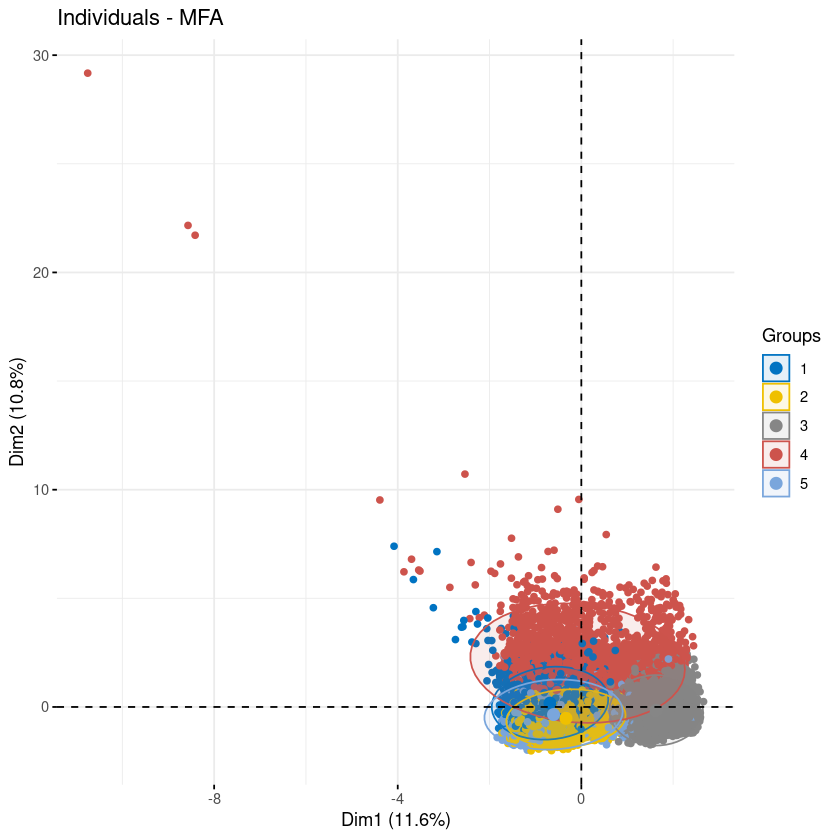

In [137]:
set.seed(123)
coords <- res.mfa$ind$coord
km_res <- kmeans(coords, centers = 5, nstart = 25)
fviz_mfa_ind(res.mfa,habillage = as.factor(km_res$cluster),palette = "jco", addEllipses = TRUE, label = "none")

In [145]:
table(as.factor(km_res$cluster), data_quali$person_home_ownership)

   
    MORTGAGE OTHER   OWN  RENT
  1     2581    39   235  7895
  2      280     1    44   296
  3    10073    48  1774 10445
  4     5555    29   898  4807